In [ ]:
Implementation of page ranking algorithm for 

In [1]:

import requests

from bs4 import BeautifulSoup
import time
import string
import os
import re
import collections
from nltk import word_tokenize, regexp_tokenize, ngrams, FreqDist
from nltk.corpus import stopwords
import numpy as np
from urllib.parse import urlsplit
import matplotlib.pyplot as plt
%matplotlib inline

## TASK 2

In [3]:
# This function will exclude images, links to sections in the same page and non english urls
def excludeURL(url):
    not_english = False
    not_new_urls = (url.startswith('#') or url.endswith('.jpg') or url.startswith('//') or url.startswith('/w/index.php')
                   or ':' in url)
    if "https" in url:
        url = url.replace("https://", "")
        not_english = not(url.startswith("en"))
    return not_new_urls or not_english

# The following function is used to retrieve all valid urls in a page
# for a given url it returns all links in the current page

def getURLs(parent_url):
    url_init = "https://en.wikipedia.org"
    time.sleep(0.5)
    page = requests.get(parent_url)
    soup = BeautifulSoup(page.content, 'html.parser')
    urls = soup.find_all('a', href = True)
    return [url_init + item['href'] for item in urls if not excludeURL(item['href'])]


# Helper function to get title of the page from a URL
# Input: URL , Output: Title of the page pointed to by the url

def get_docId(url):
    parsed = urlsplit(url)
    return parsed.path.split('/')[2]
    

# Build a graph given a list of URLs
# Returns a graph as a adjacency list
# For every url in the list :
# Get all outgoing links
# append the current url to each of those link's incoming list if the link is also in the list


def buildGraph(url_list):
    G1 = collections.defaultdict(list)
    for url in url_list:
        out_node = get_docId(url)
        links = getURLs(url)
        for link in links:
            link = link.split('#')[0]
            if link in url_list:
                in_node = get_docId(link)
                if out_node not in G1[in_node] and out_node != in_node:
                    G1[in_node].append(out_node)
    return G1



#Helper function to reverse graph as the initial graph has incoming links
#Traverses through each node in the graph and adds current node as outgoing 
#node for every neighbor

def reverseGraph(G):
    G_rev = collections.defaultdict(list)
    for vertex in G.keys():
        for neighbor in G[vertex]:
            G_rev[neighbor].append(vertex)
    return G_rev
        
    



In [4]:
urls = open("BFS.txt", "r").read().splitlines()
G1 = buildGraph(urls)

In [5]:
focused_urls = open("FOCUSED.txt", 'r').read().splitlines()
G2 = buildGraph(focused_urls)

In [9]:
# Save graph files
f = open("Graph_G1.txt", 'w+')
for item,value in G1.items():
    f.write(item + " : " + str(value) + "\n")
f.close()
f = open("Graph_G2.txt", "w")
for item,value in G2.items():
    f.write(item + " : " + str(value) + "\n")
f.close()

In [23]:
# Statistics of G1 and G2
zero_inLinks = [item for item, value in G1.items() if len(G1[item]) == 0]
print("Number of sources with zero inlinks for G1: ", len(zero_inLinks))
print("Sources in G1 with no in-links: ", zero_inLinks)
max_indegree = max([len(values) for item, values in G1.items()])
print("Maximum in-degree in G1: ", max_indegree)
zero_inLinks_G2 = [get_docId(item) for item in focused_urls if get_docId(item) not in G2.keys()]
print("Number of sources with zero inlinks for G2: ", len(zero_inLinks_G2))
print("Sources in G2 with no in-links: ", zero_inLinks_G2)
max_indegree_G2 = max([len(values) for item, values in G2.items()])
print("Maximum in-degree in G2: ", max_indegree_G2)



Number of sources with zero inlinks for G1:  1
Sources in G1 with no in-links:  ['Ceres']
Maximum in-degree in G1:  345
Number of sources with zero inlinks for G2:  1
Sources in G2 with no in-links:  ['ExoMars_Rover']
Maximum in-degree in G2:  464


In [27]:
G1_rev = reverseGraph(G1)
G2_rev = reverseGraph(G2)
zero_outLinks = [get_docId(item) for item in urls if get_docId(item) not in G1_rev.keys()]
print("Number of sources with zero outlinks for G1: ", len(zero_outLinks))
print("Sources in G1 with no out-links: ", zero_outLinks)
max_outdegree = max([len(values) for item, values in G1_rev.items()])
print("Maximum out-degree in G1: ", max_outdegree)
zero_outLinks_G2 = [get_docId(item) for item in focused_urls if get_docId(item) not in G2_rev.keys()]
print("Number of sources with zero outlinks for G2: ", len(zero_outLinks_G2))
print("Sources in G2 with no out-links: ", zero_outLinks_G2)
max_outdegree_G2 = max([len(values) for item, values in G2_rev.items()])
print("Maximum out-degree in G2: ", max_outdegree_G2)



Number of sources with zero outlinks for G1:  8
Sources in G1 with no out-links:  ['Crore', 'Private_property', 'Land_claim', 'Northwestern_India', 'Alpine_exploration', 'Emmeline_Stuart-Wortley', 'Lethargy', 'Acute_health_hazard']
Maximum out-degree in G1:  373
Number of sources with zero outlinks for G2:  54
Sources in G2 with no out-links:  ['Mark_Andrews_(filmmaker)', 'Return_to_Mars', 'Fractional_Orbital_Bombardment_System', 'Marinococcus', 'Al-Aqsa_Martyrs%27_Brigades', 'Stalin_vs._Martians', 'Men,_Martians_and_Machines', 'The_Martian_Chronicles_(video_game)', 'Maurice_LaMarche', 'Steve_Martin', 'Marching_band', 'Trojan_Marching_Band', 'Bi-Mart', 'Don_Markstein%27s_Toonopedia', 'Martha_Coolidge', 'San_Marino', 'Marie_Curie', 'Mark_82_bomb', 'Mars_Society_Australia', 'Lobster_Man_from_Mars', 'Mary_A._Turzillo', 'Alastair_Reynolds', 'Sky_Galleons_of_Mars', 'Marvel_Family', 'Mars_Matrix', 'Terraforming_Mars_(board_game)', 'Marketing_mix', 'Marshall_Savage', 'Vladimir_Mikhailovich_Ko

In [26]:
[get_docId(item) for item in urls if get_docId(item) not in G1_rev.keys()]

['https://en.wikipedia.org/wiki/Crore',
 'https://en.wikipedia.org/wiki/Private_property',
 'https://en.wikipedia.org/wiki/Land_claim',
 'https://en.wikipedia.org/wiki/Northwestern_India',
 'https://en.wikipedia.org/wiki/Alpine_exploration',
 'https://en.wikipedia.org/wiki/Emmeline_Stuart-Wortley',
 'https://en.wikipedia.org/wiki/Lethargy',
 'https://en.wikipedia.org/wiki/Acute_health_hazard']

## TASK 3

In [109]:
''' Page Rank implementation based on the algorithm in Textbook
Input: Graph, number of nodes in the graph with outgoing links, Lambda, maximum number of iterations 
Output: Pages sorted by their ranks in descending order
'''

def pageRank(G, N, alpha, max_iterations):
    sum_page_rank = []
    l2_norm = []
    P = list(G.keys())          # All pages with outgoing links
    I = np.zeros(N)             # Current page rank estimate vector
    R = np.zeros(N)             # vector that will hold the better estimate for page rank
    I = I + (1 / N) # Initialize the vector with initial probabilities
    I_p = I
    tolerance = 0.0005          # convergence factor
    diff = float('inf')         # variable to store improvement  after each iteration
    iterations = 0
    converge_iter = 0           # to track converging iterations
    while iterations < max_iterations and converge_iter <= 4:
        R = np.zeros(N) + (alpha / N)                                       # Initialize R with lambda/|P|
        for page in P:
            idx = P.index(page)                          # For every page get its index so that corresponding rank can be updated
            Q = [item for item in G[page] if item in P]  # Get only non dangling links
            if len(Q) > 0:
                for link in Q:
                    R[P.index(link)] += (1 - alpha) * I[idx] / len(Q)    # Update corresponding rank with probability of being at p
            else:
                for p in P:                               # No outgoing links - update all pages with prob (1 − λ)Ip
                    p_idx = P.index(p)
                    R[p_idx] += (1 - alpha) * I[p_idx] / N
        diff = np.sqrt(sum((I - R) ** 2)) 
        I = R                              # compute L2 norm
        l2_norm.append(diff)
        if diff <= tolerance:                                   # check if it has converged
            converge_iter += 1                                  # increment convergence iteration
        else:
            converge_iter = 0  # This is to ensure the algorithm converges for 4 consecutive iterations otherwise it is reset to 0
        sum_page_rank.append(sum(R))
        iterations += 1  # Increment iterations

    ranked_pages = zip(P, R)    # combine the nodes and rank with a 1:1 mapping

    # returns the list of pages sorted by rank in descending order
    return sorted(ranked_pages, key=lambda x: x[1], reverse=True) , sum_page_rank, l2_norm

In [143]:
# Test graph
G = {'A':['D','E', 'F'], 'B': ['A', 'F'], 'C': ['A', 'B', 'D'], 'D': ['B','C'], 'E':['B', 'C', 'D','F'],'F':['A', 'B', 'D']}
G = reverseGraph(G)
rank_test = pageRank(G, 6, 0.15, 10)

In [145]:
rank_test[0]

[('A', 0.2520363760281718),
 ('E', 0.18710661014291707),
 ('F', 0.15129376593475066),
 ('C', 0.15129376593475066),
 ('B', 0.13930650918251075),
 ('D', 0.11896297277689877)]

In [110]:
# Page rank on G1 with lambda = 0.15
ranked_pages,page_rank_sum,l2_norm = pageRank(G1_rev, len(G1_rev.items()), 0.15, 100)

In [121]:
# Page rank on G2 with lambda = 0.15
ranked_pages_focused,page_rank_sum_focused,l2_norm_focused = pageRank(G2_rev, len(G2_rev.items()), 0.15, 100)

## Task 4

In [112]:
# Rerun page rank with different lambda
lambda_25_rank, sum_25, norm_25 = pageRank(G1_rev, len(G1_rev.items()), 0.25, 100)
lambda_35, sum_35, norm_35 = pageRank(G1_rev,  len(G1_rev.items()), 0.35, 100)
lambda_5, sum_5, norm_5 = pageRank(G1_rev, len(G1_rev.items()), 0.5, 100)

Text(0, 0.5, 'Number of iterations')

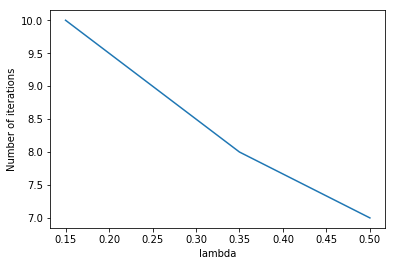

In [113]:
x = [0.15, 0.25, 0.35, 0.5]
y = [len(l2_norm), len(norm_25), len(norm_35), len(norm_5)]
plt.plot(x, y)
plt.xlabel("lambda")
plt.ylabel("Number of iterations")

Text(0, 0.5, 'Highest page rank value')

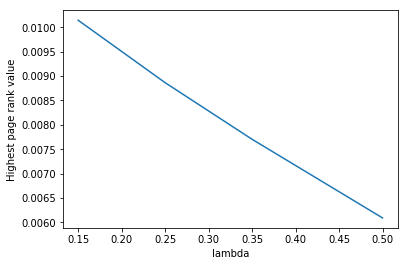

In [114]:
y = [ranked_pages[0][1], lambda_25_rank[0][1], lambda_35[0][1], lambda_5[0][1]]
plt.plot(x, y)
plt.xlabel("lambda")
plt.ylabel("Highest page rank value")

In [125]:
# Same for G2
lambda_25_rank, sum_25, norm_25 = pageRank(G2_rev, len(G2_rev.items()), 0.25, 100)
lambda_35, sum_35, norm_35 = pageRank(G2_rev,  len(G2_rev.items()), 0.35, 100)
lambda_5, sum_5, norm_5 = pageRank(G2_rev, len(G2_rev.items()), 0.5, 100)

In [127]:
# Rerun the algorithm for exactly 4 iterations
ranked_4, sum_4, norm_4 = pageRank(G1_rev, len(G1_rev.items()), 0.15, 4)
ranked_4_focused, sum_4_focused, norm_4_focused = pageRank(G2_rev, len(G2_rev.items()), 0.15, 4)

In [131]:
ranked_pages[:10]


[('United_States', 0.010147337486326385),
 ('Earth', 0.008343294594921273),
 ('NASA', 0.007691943297653505),
 ('Sun', 0.006309901015871733),
 ('India', 0.00598393804533771),
 ('Australia', 0.005814353909201013),
 ('Astronomy', 0.005670561401520953),
 ('Moon', 0.00531308342320426),
 ('United_Kingdom', 0.005176488410628981),
 ('Europe', 0.004869988923359988)]

In [132]:
ranked_4[:10]

[('United_States', 0.009903751679761184),
 ('Earth', 0.008382124074801631),
 ('NASA', 0.007787599209815686),
 ('Sun', 0.006355677116928127),
 ('India', 0.005907654412157906),
 ('Astronomy', 0.005662740880851322),
 ('Australia', 0.0056097991360180835),
 ('Moon', 0.0054019449386202584),
 ('United_Kingdom', 0.005020821085270954),
 ('Europe', 0.004786409671927112)]

In [133]:
# Sort the documents based on inlink count and compare with output of page rank
top_inlinks_G1 = [key for key in sorted(G1, key=G1.__getitem__, reverse=True)][:25]
top_inlins_G2 =  [key for key in sorted(G2, key=G2.__getitem__, reverse=True)][:25]

In [146]:
top_25_pages = [x[0] for x in ranked_pages][:25]
top_25_focused = [x[0] for x in ranked_pages_focused][:25]

In [147]:
top_inlins_G2

['Francesco_Maria_Grimaldi',
 'Joanna_(Joka)_Maria_Vandenberg',
 'Evolution_of_water_on_Mars_and_Earth',
 'Evidence_of_water_on_Mars_found_by_Mars_Reconnaissance_Orbiter',
 'Mariner_11',
 'Mariner_12',
 'Uranus_Pathfinder',
 'Maryland_Stadium',
 'Mighty_Sound_of_Maryland',
 'Maryland_Terrapins_football',
 'Maryland_Terrapins_men%27s_lacrosse',
 'University_of_Maryland_Golf_Course',
 'University_of_Maryland_Arboretum_%26_Botanical_Garden',
 'University_of_Maryland_Libraries',
 'Maryland_Terrapins',
 'Mount_St._Mary%27s_University',
 'University_of_Maryland,_Baltimore',
 'Flag_of_Maryland',
 'Maryland_General_Assembly',
 'University_System_of_Maryland',
 'Maryland_Transit_Administration',
 'Province_of_Maryland',
 'University_of_Maryland,_Eastern_Shore',
 'University_of_Maryland_System',
 'Maryland_Food_Collective']

In [148]:
top_25_focused

['Mars',
 'Submarine',
 'Maryland',
 'Low_Earth_orbit',
 'Orbit',
 'Orbital_eccentricity',
 'Exploration_of_Mars',
 'Colonization_of_Mars',
 'Marshall_Plan',
 'Lagrangian_point',
 'Orbital_period',
 'Lockheed_Martin',
 'Mars_rover',
 'Human_mission_to_Mars',
 'Geosynchronous_orbit',
 'Geocentric_orbit',
 'Mars_Society',
 'Perturbation_(astronomy)',
 'Hohmann_transfer_orbit',
 'Mars_landing',
 'Mars_to_Stay',
 'Terraforming_of_Mars',
 'Inspiration_Mars_Foundation',
 'Orbital_mechanics',
 'Heliocentric_orbit']